### Initial Setup
Import necessary libraries, load the dataset, and perform a cursory look at the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('pastel')
sns.set() # set defaults to those of seaborn

# load the dataset into the initial dataframe

idf = pd.read_csv('C:\DATA\marketing_training.csv', sep=',')

idf.info()

idf.head()
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
custAge           5610 non-null float64
profession        7414 non-null object
marital           7414 non-null object
schooling         5259 non-null object
default           7414 non-null object
housing           7414 non-null object
loan              7414 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       6703 non-null object
campaign          7414 non-null int64
pdays             7414 non-null int64
previous          7414 non-null int64
poutcome          7414 non-null object
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pmonths           7414 non-null float64
pastEmail         7414 non-null int64
responded         7414 non-null object
dtypes: float64(7), int64(4), ob

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


It can be seen by comparing the number of values for different columns that there are missing data for `custAge`, `schooling`, and `day_of_week`.

In [2]:
# Set up count plots for feature distribution; this saves some typing

def countplot_Y(label, dataframe):
    Y = dataframe[label]
    total = len(Y)*1. # ensures that the value is a float
    ax = sns.countplot(x = label, data = dataframe, hue = "blue")
    
    for i in ax.patches:
        ax.annotate('{:.1f}%'.format(100*i.get_height()/total), (i.get_x()+0.1, i.get_height() + 5))
        
    ax.yaxis.set_ticks(np.linspace(0, total, 11)) # sets up 10 steps (11 ticks) from 0 to n_rows in dataframe
    
    # Adjust tick labels to fit
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

def countplot(label, dataframe):
    plt.figure(figsize=(12,6))
    Y = dataframe[label]
    total = len(Y)*1.
    ax=sns.countplot(x = label, data = dataframe)
    
    for i in ax.patches:
        ax.annotate('{:.1f}%'.format(100*i.get_height()/total), (i.get_x()+0.1, i.get_height()+5))

    ax.yaxis.set_ticks(np.linspace(0, total, 11)) # sets up 10 steps (11 ticks) from 0 to n_rows in dataframe
    # Adjust tick labels to fit
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

### List distributions for each demographic categorical variable:

In [3]:
print(idf['profession'].value_counts())
print()
print(idf['marital'].value_counts())
print()
print(idf['schooling'].value_counts())


admin.           1885
blue-collar      1665
technician       1212
services          719
management        536
retired           307
entrepreneur      275
self-employed     248
housemaid         187
unemployed        173
student           146
unknown            61
Name: profession, dtype: int64

married     4445
single      2118
divorced     843
unknown        8
Name: marital, dtype: int64

university.degree      1554
high.school            1216
basic.9y                784
professional.course     664
basic.4y                534
basic.6y                275
unknown                 231
illiterate                1
Name: schooling, dtype: int64


### List distributions for each customer financial variable:

In [4]:
print(idf['default'].value_counts())
print()
print(idf['housing'].value_counts())
print()
print(idf['loan'].value_counts())

no         5981
unknown    1432
yes           1
Name: default, dtype: int64

yes        3840
no         3406
unknown     168
Name: housing, dtype: int64

no         6099
yes        1147
unknown     168
Name: loan, dtype: int64


### List the distribution for the response variable, `responded`.

In [5]:
print(idf['responded'].value_counts())

no     6574
yes     840
Name: responded, dtype: int64


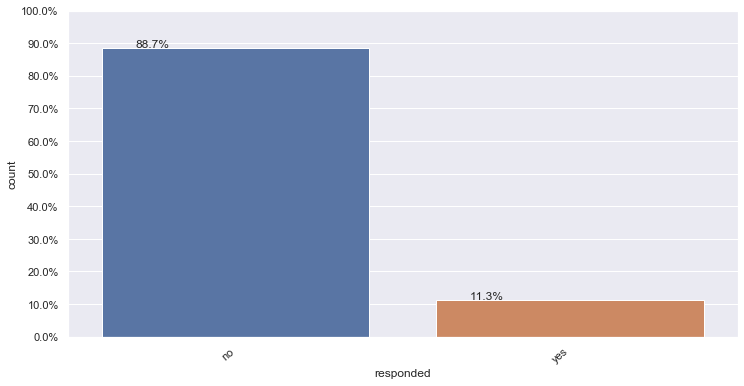

In [6]:
countplot('responded', idf)

It can be seen that the response variable is highly unbalanced.

### custAge
Create a distribution plot of `custAge`:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 7413
Data columns (total 1 columns):
custAge    5610 non-null float64
dtypes: float64(1)
memory usage: 87.7 KB


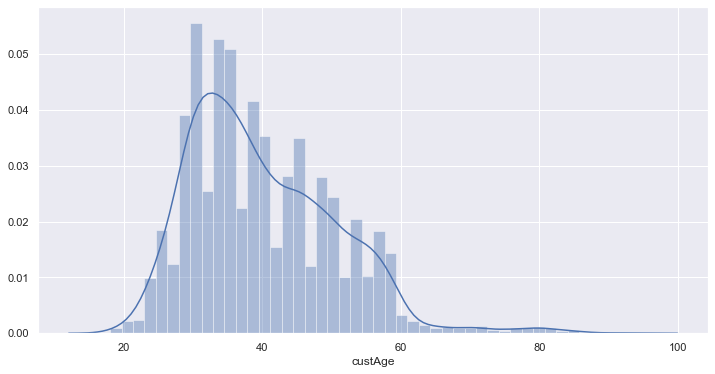

In [7]:
custAgeDf = pd.DataFrame(idf.custAge.dropna()) # Create a dataframe of custAge dropping only the NA values in that category
custAgeDf.info()

plt.figure(figsize=(12, 6))
sns.distplot(custAgeDf['custAge'])

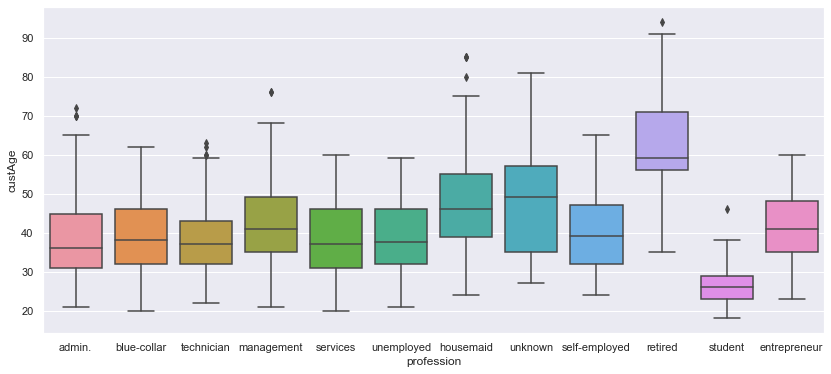

In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot( x = idf['profession'], y=idf['custAge'])

As may be expected, there is considerable variance in the distribution of `custAge` when considered by `profession` class. With the exception of some outliers, students are younger than retirees.

In [9]:
pd.pivot_table(idf, index=['profession'], values=['custAge'])

,custAge
profession,
admin.,38.067626
blue-collar,39.260125
entrepreneur,41.341014
housemaid,47.207143
management,42.044444
retired,62.741525
self-employed,40.102041
services,38.577206
student,26.366071


### campaign

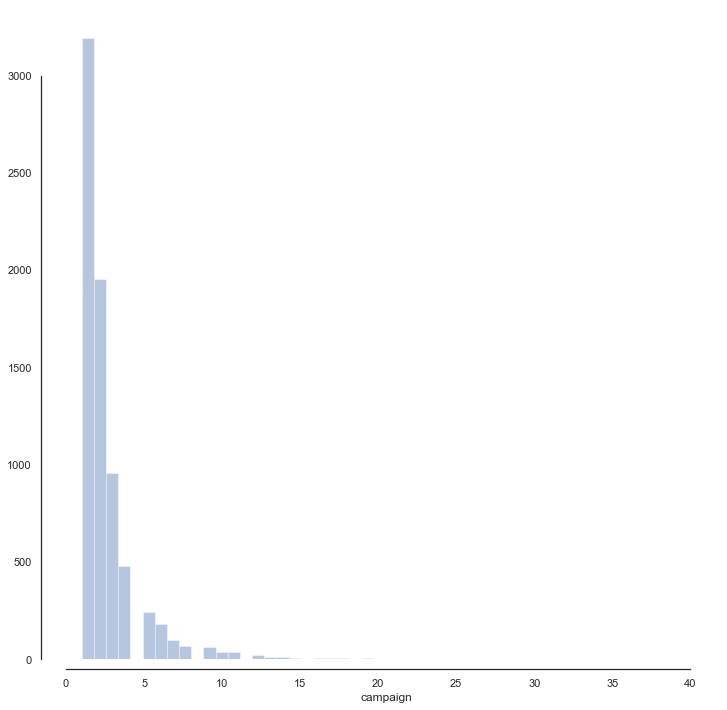

In [10]:
sns.set_style('white')
plt.figure(figsize=(12, 12))
sns.distplot(idf['campaign'], kde = False)
sns.despine(offset=10, trim = True)

The histogram for `campaign` shows that the overwhelming majority of customers have had five or fewer contacts during the campaign. It is suggested to bin this category. Initially, these will be binned into values of `[0, 5, 10, 20, 40]`.

In [11]:
campaign_bins = [0, 5, 10, 20, 40]
campaignDf = pd.DataFrame(pd.cut(idf.campaign, bins = campaign_bins))
campaignDf['responded'] = idf.responded

Print out the counts of `responded`, grouped by `campaign`:

In [12]:
print(campaignDf.groupby('campaign').responded.value_counts()) # prints value counts of 'responded', grouped by 'campaign'

campaign  responded
(0, 5]    no           6020
          yes           804
(5, 10]   no            413
          yes            29
(10, 20]  no            118
          yes             7
(20, 40]  no             23
Name: responded, dtype: int64


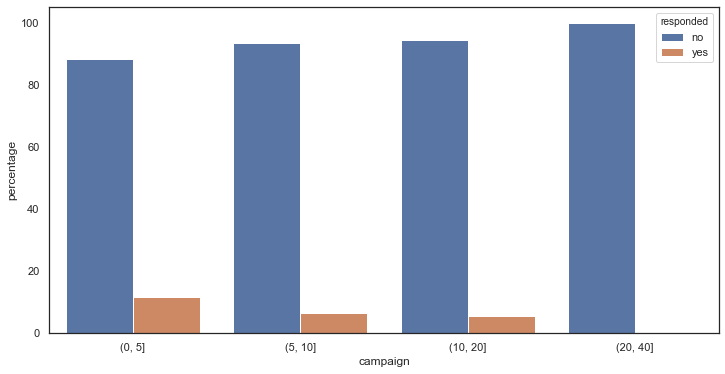

In [13]:
plt.figure(figsize=(12, 6))
responded_counts = (campaignDf.groupby(['campaign'])['responded']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('responded'))
p = sns.barplot(x="campaign", y="percentage", hue='responded', data=responded_counts)
_ = plt.setp(p.get_xticklabels(), rotation=0)  # Rotate labels

From the grouped bar chart, it appears that `campaign` may potentially be a viable predictor of `responded`. We will further investigate by binning into quartiles:

In [14]:
campaignDfEq = pd.DataFrame(pd.qcut(idf.campaign.rank(method='first'), q=4, duplicates='raise'))

In [15]:
campaignDfEq['responded'] = idf['responded']

In [16]:
print(campaignDfEq.campaign.value_counts())
print()
print(campaignDfEq.groupby('campaign').responded.value_counts()) # prints value counts of 'responded', grouped by 'campaign'

(5560.75, 7414.0]    1854
(0.999, 1854.25]     1854
(3707.5, 5560.75]    1853
(1854.25, 3707.5]    1853
Name: campaign, dtype: int64

campaign           responded
(0.999, 1854.25]   no           1604
                   yes           250
(1854.25, 3707.5]  no           1622
                   yes           231
(3707.5, 5560.75]  no           1654
                   yes           199
(5560.75, 7414.0]  no           1694
                   yes           160
Name: responded, dtype: int64


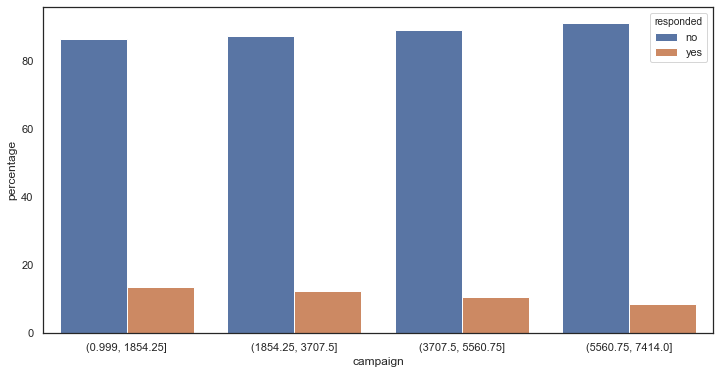

In [17]:
plt.figure(figsize=(12, 6))
responded_countsEq = (campaignDfEq.groupby(['campaign'])['responded']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('responded'))
p = sns.barplot(x="campaign", y="percentage", hue='responded', data=responded_countsEq)
_ = plt.setp(p.get_xticklabels(), rotation=0)  # Rotate labels

Using bins with approximately equal count also shows possible correlation, but not as marked as previously. We will use `campaign_bins = [0, 5, 10, 20, 40]`.

### A new column with the binned values of `campaign` will be appended to the initial dataframe:

In [18]:
idf['campaignBinned'] = pd.DataFrame(pd.cut(idf.campaign, bins = campaign_bins)) # Add column for binned values of campaign

### pdays
The `pdays` variable refers to the number of days passed since the last contact; with values of '999' indicating that the customer was never previously contacted.

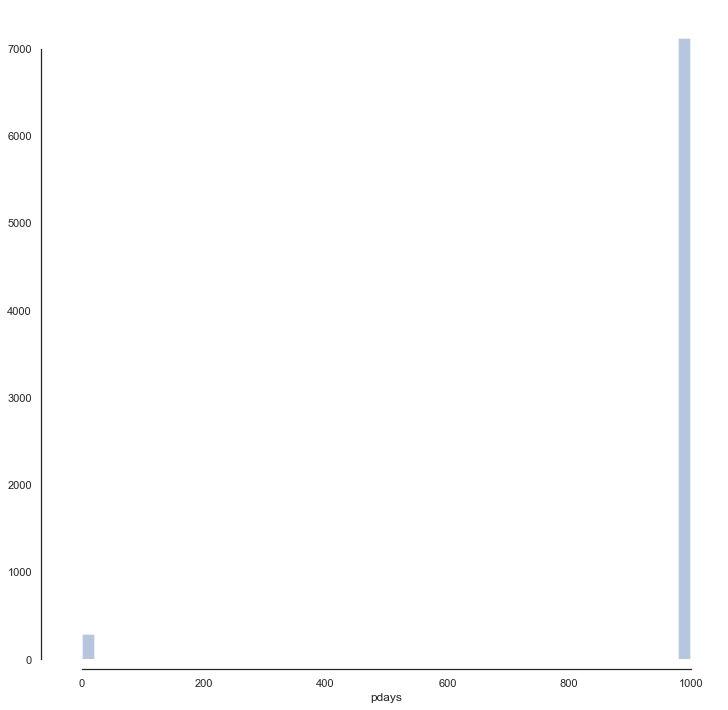

In [19]:
sns.set_style('white')
plt.figure(figsize=(12, 12))
sns.distplot(idf['pdays'], kde = False)
sns.despine(offset=10, trim = True)

In [20]:
print(idf.pdays.value_counts())

999    7123
6        85
3        82
4        22
7        15
9        15
2        13
12       11
10        8
5         7
13        6
14        5
11        4
15        4
8         3
1         3
0         2
16        2
17        2
22        1
21        1
Name: pdays, dtype: int64


Binning the `pdays` variable: Knowing that the largest quantity for pdays is 22, we will bin from 23 to 999 to catch the '999' flag, and divide the remainder into approximately equal ranges.

In [21]:
pdays_bin = [0,7,15,23,1000]

In [22]:
pdaysDfEq = pd.DataFrame(pd.cut(idf.pdays, bins=pdays_bin))
pdaysDfEq['responded'] = idf['responded']
print(pdaysDfEq.pdays.value_counts())
print()
print(pdaysDfEq.groupby('pdays').responded.value_counts()) # prints value counts of 'responded', grouped by 'campaign'

(23, 1000]    7123
(0, 7]         227
(7, 15]         56
(15, 23]         6
Name: pdays, dtype: int64

pdays       responded
(0, 7]      yes           148
            no             79
(7, 15]     yes            36
            no             20
(15, 23]    no              3
            yes             3
(23, 1000]  no           6471
            yes           652
Name: responded, dtype: int64


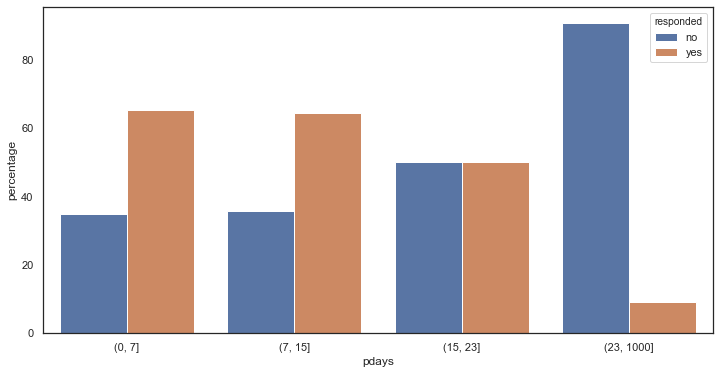

In [23]:
plt.figure(figsize=(12, 6))
responded_countsEq = (pdaysDfEq.groupby(['pdays'])['responded']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('responded'))
p = sns.barplot(x="pdays", y="percentage", hue='responded', data=responded_countsEq)
_ = plt.setp(p.get_xticklabels(), rotation=0)  # Rotate labels

### A new column with the binned values of `pdays` will be appended to the initial dataframe:

In [24]:
idf['pdaysBinned'] = pd.DataFrame(pd.cut(idf.pdays, bins = pdays_bin)) # Add column for binned values of campaign

### previous
The `previous` variable indicates the quantity of contacts initiated with the subject prior to the current campaign.

In [25]:
print(idf.previous.value_counts())
idf.previous.value_counts().to_clipboard()

0    6350
1     855
2     147
3      41
4      13
5       7
6       1
Name: previous, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\clipboards.py:117: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  obj.to_csv(buf, sep=sep, encoding="utf-8", **kwargs)


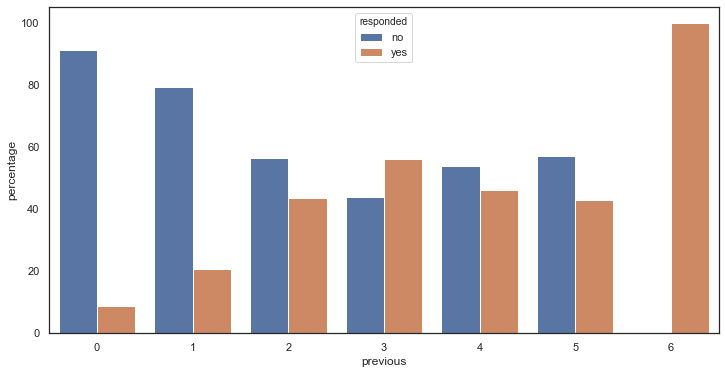

In [26]:
plt.figure(figsize=(12, 6))
responded_countsEq = (idf.groupby(['previous'])['responded']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('responded'))
p = sns.barplot(x="previous", y="percentage", hue='responded', data=responded_countsEq)
_ = plt.setp(p.get_xticklabels(), rotation=0)  # Rotate labels

### poutcome
The `poutcome` variable indicates the outcome of the previous marketing campaign.

In [27]:
print(idf.poutcome.value_counts())
idf.poutcome.value_counts().to_clipboard()
print()
print(idf.groupby('poutcome').responded.value_counts())

nonexistent    6350
failure         800
success         264
Name: poutcome, dtype: int64

poutcome     responded
failure      no            702
             yes            98
nonexistent  no           5783
             yes           567
success      yes           175
             no             89
Name: responded, dtype: int64


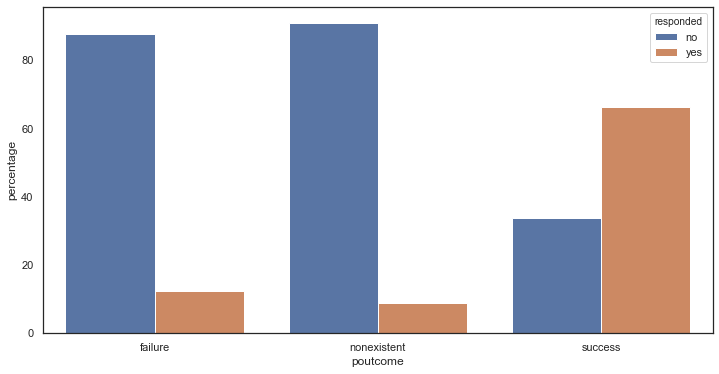

In [28]:
plt.figure(figsize=(12, 6))
responded_countsEq = (idf.groupby(['poutcome'])['responded']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('responded'))
p = sns.barplot(x="poutcome", y="percentage", hue='responded', data=responded_countsEq)
_ = plt.setp(p.get_xticklabels(), rotation=0)  # Rotate labels

### Since _nonexistent_ and _failure_ are not clearly differentiated, we will assume them to be synonymous, as neither constitutes a known success. Thus, values of _nonexistent_ will be replaced by _failure_.

In [29]:
# Create a new column, populate with 'failure' if value of poutcome is 'nonexistent', else copy value of poutcome

idf['poutcome_comb'] = ['failure' if x=='nonexistent' else x for x in idf['poutcome'] ]

In [30]:
print(idf.poutcome_comb.value_counts())
idf.poutcome.value_counts().to_clipboard()
print()
print(idf.groupby('poutcome_comb').responded.value_counts())

failure    7150
success     264
Name: poutcome_comb, dtype: int64

poutcome_comb  responded
failure        no           6485
               yes           665
success        yes           175
               no             89
Name: responded, dtype: int64


The resulting distribution:

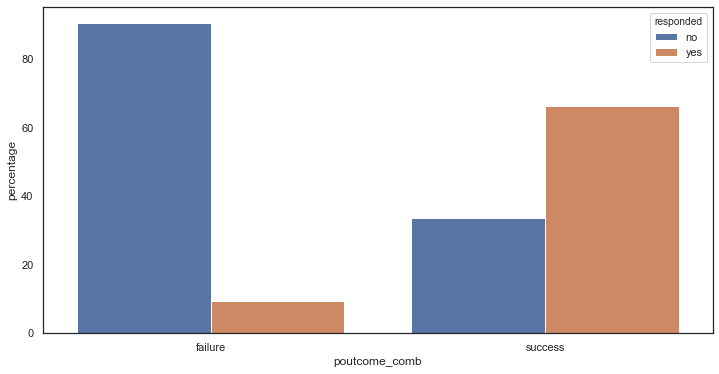

In [31]:
plt.figure(figsize=(12, 6))
responded_countsEq = (idf.groupby(['poutcome_comb'])['responded']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('responded'))
p = sns.barplot(x="poutcome_comb", y="percentage", hue='responded', data=responded_countsEq)
_ = plt.setp(p.get_xticklabels(), rotation=0)  # Rotate labels

### pmonths

In [32]:
print(idf.pmonths.value_counts())


999.000000    7123
0.200000        85
0.100000        82
0.133333        22
0.233333        15
0.300000        15
0.066667        13
0.400000        11
0.333333         8
0.166667         7
0.433333         6
0.466667         5
0.366667         4
0.500000         4
0.033333         3
0.266667         3
0.566667         2
0.533333         2
0.000000         2
0.700000         1
0.733333         1
Name: pmonths, dtype: int64


The `pmonths` category appears to be the `pdays` column divided by 30, and is thus redundant. It will be omitted due to its obvious correlation with `pdays`.

### pastEmail

In [33]:
print(idf.pastEmail.value_counts())


0     6495
2      296
1      224
3      162
4      113
6       40
5       34
8       18
12      10
10       6
9        6
15       3
7        2
18       2
16       2
14       1
Name: pastEmail, dtype: int64


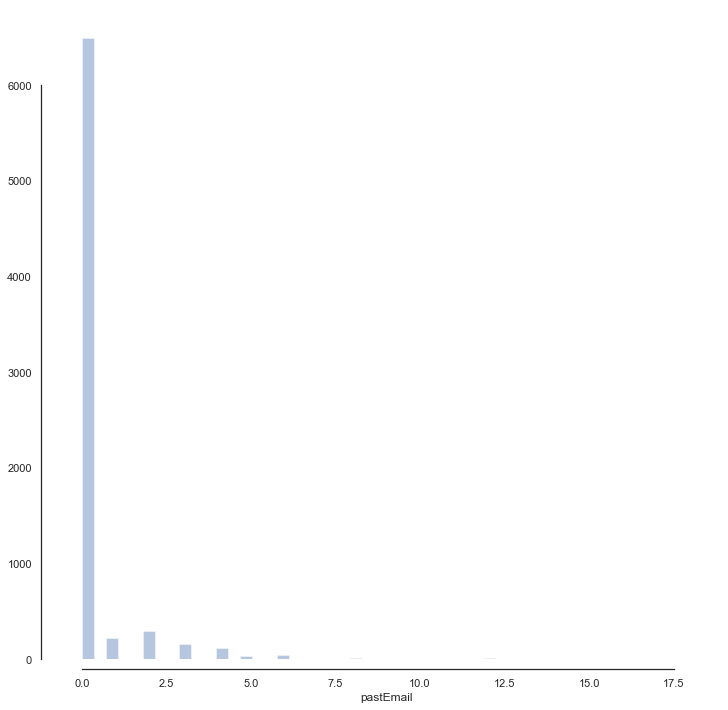

In [34]:
sns.set_style('white')
plt.figure(figsize=(12, 12))
sns.distplot(idf['pastEmail'], kde = False)
sns.despine(offset=10, trim = True)

### Schooling
Schooling has missing values. As there is already a class within schooling for _unknown_ all missing values will be coded as _unknown_. Additionally, the one occurence of the class _illiterate_ will be combined with _basic.4y_.

In [35]:
# Create a new column, populate with 'unknown' if value of schooling is 'NaN', else copy value of schooling

idf['schooling_mod'] = idf['schooling'].fillna('unknown')

In [36]:
print(idf.schooling_mod.value_counts())
idf.schooling_mod.value_counts().to_clipboard()

unknown                2386
university.degree      1554
high.school            1216
basic.9y                784
professional.course     664
basic.4y                534
basic.6y                275
illiterate                1
Name: schooling_mod, dtype: int64


Change the single instance of 'illiterate' to 'basic.4y'

In [37]:
idf['schooling_mod'] = ['basic.4y' if x=='illiterate' else x for x in idf['schooling_mod'] ]

In [38]:
print(idf.schooling_mod.value_counts())
idf.schooling_mod.value_counts().to_clipboard()

unknown                2386
university.degree      1554
high.school            1216
basic.9y                784
professional.course     664
basic.4y                535
basic.6y                275
Name: schooling_mod, dtype: int64


### The resulting dataframe:

In [39]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 26 columns):
custAge           5610 non-null float64
profession        7414 non-null object
marital           7414 non-null object
schooling         5259 non-null object
default           7414 non-null object
housing           7414 non-null object
loan              7414 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       6703 non-null object
campaign          7414 non-null int64
pdays             7414 non-null int64
previous          7414 non-null int64
poutcome          7414 non-null object
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pmonths           7414 non-null float64
pastEmail         7414 non-null int64
responded         7414 non-null object
campaignBinned    7414 non-null 

In [40]:
idf.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,campaignBinned,pdaysBinned,poutcome_comb,schooling_mod
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,-42.0,4.191,5195.8,999.0,0,no,"(0, 5]","(23.0, 1000.0]",failure,university.degree
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,-42.7,4.960,5228.1,999.0,0,no,"(0, 5]","(23.0, 1000.0]",failure,unknown
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,999.0,0,no,"(0, 5]","(23.0, 1000.0]",failure,high.school
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,-42.7,4.962,5228.1,999.0,0,no,"(0, 5]","(23.0, 1000.0]",failure,unknown
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,-46.2,1.291,5099.1,999.0,1,no,"(0, 5]","(23.0, 1000.0]",failure,university.degree


### The dataset still has a number of null values for `custAge`. The options at this point are:
1. Drop all records with no customer age
2. Populate all nulls for customer age with the mean age for all customers
3. Populate all nulls for customer age with the mean age for that customer's profession

Given that there is an expected correlation between 'custAge' and 'profession', particularly with students and retirees, Option #3 appears to best preserve the expected value of the missing data.

In [41]:
# First, get a list of the unique profession categories
prof_categories = list(idf['profession'].unique())
prof_categories

['admin.',
 'blue-collar',
 'technician',
 'management',
 'services',
 'unemployed',
 'housemaid',
 'unknown',
 'self-employed',
 'retired',
 'student',
 'entrepreneur']

In [42]:

'''
Define a function which
finds the mean of a specific continuous variable in a dataframe,
grouped by a specific one-hot encoded variable for which its value is 1
'''
def categoryMean(df,contVar,groupBy,category):
    return df.groupby([groupBy],axis=0)[contVar].mean()[category]

In [43]:
# Create a dictionary to hold the category/value pair for professional categories and their mean ages

ProfMeanAge = {col :categoryMean(idf,'custAge', 'profession', col) for col in prof_categories}
ProfMeanAge

{'admin.': 38.06762589928058,
 'blue-collar': 39.2601246105919,
 'technician': 38.09350935093509,
 'management': 42.044444444444444,
 'services': 38.57720588235294,
 'unemployed': 38.878787878787875,
 'housemaid': 47.207142857142856,
 'unknown': 47.955555555555556,
 'self-employed': 40.10204081632653,
 'retired': 62.74152542372882,
 'student': 26.366071428571427,
 'entrepreneur': 41.34101382488479}

### Replace the null values in `profession` with the mean for that customer's profession:

In [44]:
for index,row in idf.iterrows():
    if np.isnan(row['custAge']):
        idf.set_value(index,'custAge',ProfMeanAge[row['profession']])
#        row['custAge'] = ProfMeanAge[row['profession']]

for index,row in idf.iterrows():
        print(row['custAge'],  row['profession'], ProfMeanAge[row['profession']])
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


55.0 admin. 38.06762589928058
39.2601246105919 blue-collar 39.2601246105919
42.0 technician 38.09350935093509
55.0 management 42.044444444444444
38.06762589928058 admin. 38.06762589928058
47.0 blue-collar 39.2601246105919
35.0 services 38.57720588235294
38.57720588235294 services 38.57720588235294
28.0 unemployed 38.878787878787875
46.0 blue-collar 39.2601246105919
38.06762589928058 admin. 38.06762589928058
41.0 blue-collar 39.2601246105919
35.0 admin. 38.06762589928058
49.0 blue-collar 39.2601246105919
47.207142857142856 housemaid 47.207142857142856
40.0 services 38.57720588235294
32.0 unknown 47.955555555555556
46.0 blue-collar 39.2601246105919
38.09350935093509 technician 38.09350935093509
34.0 services 38.57720588235294
38.0 admin. 38.06762589928058
32.0 admin. 38.06762589928058
31.0 admin. 38.06762589928058
26.0 admin. 38.06762589928058
28.0 blue-collar 39.2601246105919
30.0 self-employed 40.10204081632653
38.06762589928058 admin. 38.06762589928058
42.044444444444444 management 42

38.06762589928058 admin. 38.06762589928058
38.09350935093509 technician 38.09350935093509
44.0 services 38.57720588235294
39.2601246105919 blue-collar 39.2601246105919
55.0 admin. 38.06762589928058
36.0 blue-collar 39.2601246105919
52.0 admin. 38.06762589928058
35.0 services 38.57720588235294
45.0 management 42.044444444444444
34.0 admin. 38.06762589928058
38.06762589928058 admin. 38.06762589928058
38.0 blue-collar 39.2601246105919
38.06762589928058 admin. 38.06762589928058
55.0 blue-collar 39.2601246105919
52.0 blue-collar 39.2601246105919
54.0 blue-collar 39.2601246105919
38.06762589928058 admin. 38.06762589928058
56.0 admin. 38.06762589928058
38.0 technician 38.09350935093509
21.0 blue-collar 39.2601246105919
49.0 admin. 38.06762589928058
39.2601246105919 blue-collar 39.2601246105919
79.0 retired 62.74152542372882
37.0 blue-collar 39.2601246105919
29.0 admin. 38.06762589928058
39.2601246105919 blue-collar 39.2601246105919
33.0 blue-collar 39.2601246105919
39.0 blue-collar 39.2601246

39.2601246105919 blue-collar 39.2601246105919
38.06762589928058 admin. 38.06762589928058
30.0 blue-collar 39.2601246105919
32.0 self-employed 40.10204081632653
31.0 blue-collar 39.2601246105919
33.0 services 38.57720588235294
34.0 blue-collar 39.2601246105919
32.0 blue-collar 39.2601246105919
38.0 management 42.044444444444444
38.57720588235294 services 38.57720588235294
34.0 technician 38.09350935093509
23.0 admin. 38.06762589928058
38.09350935093509 technician 38.09350935093509
38.06762589928058 admin. 38.06762589928058
36.0 services 38.57720588235294
27.0 admin. 38.06762589928058
49.0 admin. 38.06762589928058
29.0 technician 38.09350935093509
75.0 housemaid 47.207142857142856
24.0 student 26.366071428571427
64.0 retired 62.74152542372882
32.0 blue-collar 39.2601246105919
57.0 technician 38.09350935093509
43.0 blue-collar 39.2601246105919
36.0 services 38.57720588235294
29.0 management 42.044444444444444
26.366071428571427 student 26.366071428571427
40.0 technician 38.09350935093509


47.0 admin. 38.06762589928058
36.0 self-employed 40.10204081632653
38.0 technician 38.09350935093509
28.0 blue-collar 39.2601246105919
53.0 technician 38.09350935093509
39.2601246105919 blue-collar 39.2601246105919
62.74152542372882 retired 62.74152542372882
39.2601246105919 blue-collar 39.2601246105919
32.0 admin. 38.06762589928058
35.0 technician 38.09350935093509
41.34101382488479 entrepreneur 41.34101382488479
35.0 unemployed 38.878787878787875
48.0 services 38.57720588235294
47.0 services 38.57720588235294
38.0 management 42.044444444444444
27.0 student 26.366071428571427
26.366071428571427 student 26.366071428571427
22.0 student 26.366071428571427
38.09350935093509 technician 38.09350935093509
39.2601246105919 blue-collar 39.2601246105919
44.0 self-employed 40.10204081632653
19.0 student 26.366071428571427
43.0 blue-collar 39.2601246105919
29.0 blue-collar 39.2601246105919
39.0 services 38.57720588235294
39.0 management 42.044444444444444
60.0 retired 62.74152542372882
26.0 blue-

32.0 technician 38.09350935093509
39.2601246105919 blue-collar 39.2601246105919
38.09350935093509 technician 38.09350935093509
34.0 technician 38.09350935093509
41.0 blue-collar 39.2601246105919
37.0 admin. 38.06762589928058
29.0 admin. 38.06762589928058
47.207142857142856 housemaid 47.207142857142856
27.0 admin. 38.06762589928058
56.0 blue-collar 39.2601246105919
55.0 entrepreneur 41.34101382488479
38.06762589928058 admin. 38.06762589928058
56.0 management 42.044444444444444
35.0 admin. 38.06762589928058
28.0 blue-collar 39.2601246105919
28.0 student 26.366071428571427
45.0 technician 38.09350935093509
37.0 entrepreneur 41.34101382488479
38.0 admin. 38.06762589928058
34.0 blue-collar 39.2601246105919
44.0 management 42.044444444444444
51.0 blue-collar 39.2601246105919
48.0 technician 38.09350935093509
55.0 technician 38.09350935093509
48.0 admin. 38.06762589928058
33.0 admin. 38.06762589928058
34.0 admin. 38.06762589928058
41.0 admin. 38.06762589928058
32.0 blue-collar 39.260124610591

51.0 technician 38.09350935093509
38.06762589928058 admin. 38.06762589928058
38.09350935093509 technician 38.09350935093509
38.57720588235294 services 38.57720588235294
61.0 retired 62.74152542372882
37.0 technician 38.09350935093509
36.0 technician 38.09350935093509
39.0 entrepreneur 41.34101382488479
38.06762589928058 admin. 38.06762589928058
31.0 admin. 38.06762589928058
40.0 technician 38.09350935093509
29.0 admin. 38.06762589928058
46.0 blue-collar 39.2601246105919
32.0 entrepreneur 41.34101382488479
33.0 admin. 38.06762589928058
38.0 admin. 38.06762589928058
59.0 retired 62.74152542372882
25.0 services 38.57720588235294
57.0 technician 38.09350935093509
49.0 blue-collar 39.2601246105919
45.0 housemaid 47.207142857142856
32.0 blue-collar 39.2601246105919
33.0 admin. 38.06762589928058
36.0 management 42.044444444444444
29.0 admin. 38.06762589928058
36.0 admin. 38.06762589928058
32.0 services 38.57720588235294
38.57720588235294 services 38.57720588235294
36.0 blue-collar 39.26012461

36.0 self-employed 40.10204081632653
33.0 admin. 38.06762589928058
33.0 admin. 38.06762589928058
33.0 technician 38.09350935093509
46.0 entrepreneur 41.34101382488479
47.0 management 42.044444444444444
38.09350935093509 technician 38.09350935093509
38.57720588235294 services 38.57720588235294
40.0 blue-collar 39.2601246105919
32.0 services 38.57720588235294
40.0 technician 38.09350935093509
44.0 blue-collar 39.2601246105919
39.2601246105919 blue-collar 39.2601246105919
30.0 management 42.044444444444444
29.0 admin. 38.06762589928058
42.044444444444444 management 42.044444444444444
51.0 admin. 38.06762589928058
34.0 technician 38.09350935093509
29.0 student 26.366071428571427
39.2601246105919 blue-collar 39.2601246105919
38.57720588235294 services 38.57720588235294
29.0 admin. 38.06762589928058
38.06762589928058 admin. 38.06762589928058
58.0 retired 62.74152542372882
57.0 admin. 38.06762589928058
38.0 admin. 38.06762589928058
41.0 blue-collar 39.2601246105919
49.0 services 38.5772058823

39.2601246105919 blue-collar 39.2601246105919
38.09350935093509 technician 38.09350935093509
47.207142857142856 housemaid 47.207142857142856
30.0 unemployed 38.878787878787875
45.0 admin. 38.06762589928058
49.0 housemaid 47.207142857142856
35.0 technician 38.09350935093509
32.0 technician 38.09350935093509
23.0 entrepreneur 41.34101382488479
54.0 technician 38.09350935093509
60.0 blue-collar 39.2601246105919
42.0 admin. 38.06762589928058
35.0 admin. 38.06762589928058
29.0 admin. 38.06762589928058
33.0 technician 38.09350935093509
48.0 technician 38.09350935093509
30.0 services 38.57720588235294
38.09350935093509 technician 38.09350935093509
26.0 student 26.366071428571427
35.0 technician 38.09350935093509
50.0 admin. 38.06762589928058
55.0 blue-collar 39.2601246105919
29.0 services 38.57720588235294
37.0 blue-collar 39.2601246105919
38.57720588235294 services 38.57720588235294
45.0 services 38.57720588235294
52.0 blue-collar 39.2601246105919
38.09350935093509 technician 38.093509350935

33.0 blue-collar 39.2601246105919
44.0 technician 38.09350935093509
47.207142857142856 housemaid 47.207142857142856
32.0 admin. 38.06762589928058
62.74152542372882 retired 62.74152542372882
38.878787878787875 unemployed 38.878787878787875
41.0 technician 38.09350935093509
39.2601246105919 blue-collar 39.2601246105919
33.0 technician 38.09350935093509
47.207142857142856 housemaid 47.207142857142856
41.0 unknown 47.955555555555556
36.0 blue-collar 39.2601246105919
30.0 unemployed 38.878787878787875
39.2601246105919 blue-collar 39.2601246105919
41.34101382488479 entrepreneur 41.34101382488479
30.0 entrepreneur 41.34101382488479
40.0 admin. 38.06762589928058
30.0 blue-collar 39.2601246105919
43.0 admin. 38.06762589928058
44.0 blue-collar 39.2601246105919
36.0 management 42.044444444444444
29.0 admin. 38.06762589928058
39.0 blue-collar 39.2601246105919
42.0 blue-collar 39.2601246105919
31.0 technician 38.09350935093509
49.0 admin. 38.06762589928058
39.0 management 42.044444444444444
47.2071

58.0 management 42.044444444444444
38.09350935093509 technician 38.09350935093509
41.0 technician 38.09350935093509
38.06762589928058 admin. 38.06762589928058
37.0 blue-collar 39.2601246105919
24.0 student 26.366071428571427
38.0 admin. 38.06762589928058
38.06762589928058 admin. 38.06762589928058
32.0 technician 38.09350935093509
26.366071428571427 student 26.366071428571427
49.0 blue-collar 39.2601246105919
52.0 entrepreneur 41.34101382488479
42.0 blue-collar 39.2601246105919
31.0 admin. 38.06762589928058
47.0 management 42.044444444444444
31.0 technician 38.09350935093509
65.0 admin. 38.06762589928058
43.0 admin. 38.06762589928058
38.57720588235294 services 38.57720588235294
52.0 retired 62.74152542372882
38.09350935093509 technician 38.09350935093509
35.0 management 42.044444444444444
46.0 technician 38.09350935093509
37.0 blue-collar 39.2601246105919
39.0 admin. 38.06762589928058
38.09350935093509 technician 38.09350935093509
44.0 entrepreneur 41.34101382488479
30.0 technician 38.0

24.0 services 38.57720588235294
36.0 technician 38.09350935093509
29.0 admin. 38.06762589928058
36.0 admin. 38.06762589928058
29.0 technician 38.09350935093509
30.0 technician 38.09350935093509
48.0 entrepreneur 41.34101382488479
41.0 blue-collar 39.2601246105919
31.0 technician 38.09350935093509
34.0 admin. 38.06762589928058
66.0 retired 62.74152542372882
48.0 unemployed 38.878787878787875
40.0 admin. 38.06762589928058
39.2601246105919 blue-collar 39.2601246105919
41.34101382488479 entrepreneur 41.34101382488479
22.0 student 26.366071428571427
27.0 services 38.57720588235294
29.0 self-employed 40.10204081632653
39.0 housemaid 47.207142857142856
25.0 admin. 38.06762589928058
38.0 technician 38.09350935093509
39.0 management 42.044444444444444
30.0 admin. 38.06762589928058
61.0 retired 62.74152542372882
40.0 entrepreneur 41.34101382488479
44.0 technician 38.09350935093509
41.34101382488479 entrepreneur 41.34101382488479
36.0 admin. 38.06762589928058
47.207142857142856 housemaid 47.20714

37.0 technician 38.09350935093509
38.0 blue-collar 39.2601246105919
30.0 self-employed 40.10204081632653
39.2601246105919 blue-collar 39.2601246105919
31.0 management 42.044444444444444
33.0 admin. 38.06762589928058
26.0 services 38.57720588235294
33.0 services 38.57720588235294
27.0 technician 38.09350935093509
38.06762589928058 admin. 38.06762589928058
43.0 blue-collar 39.2601246105919
47.0 blue-collar 39.2601246105919
91.0 retired 62.74152542372882
34.0 technician 38.09350935093509
39.2601246105919 blue-collar 39.2601246105919
50.0 technician 38.09350935093509
33.0 admin. 38.06762589928058
44.0 admin. 38.06762589928058
28.0 blue-collar 39.2601246105919
49.0 unknown 47.955555555555556
32.0 technician 38.09350935093509
27.0 entrepreneur 41.34101382488479
65.0 admin. 38.06762589928058
38.09350935093509 technician 38.09350935093509
36.0 self-employed 40.10204081632653
31.0 technician 38.09350935093509
57.0 retired 62.74152542372882
55.0 admin. 38.06762589928058
31.0 services 38.57720588

38.06762589928058 admin. 38.06762589928058
30.0 technician 38.09350935093509
38.57720588235294 services 38.57720588235294
38.57720588235294 services 38.57720588235294
47.207142857142856 housemaid 47.207142857142856
38.06762589928058 admin. 38.06762589928058
30.0 admin. 38.06762589928058
41.0 admin. 38.06762589928058
38.57720588235294 services 38.57720588235294
36.0 blue-collar 39.2601246105919
53.0 blue-collar 39.2601246105919
34.0 blue-collar 39.2601246105919
33.0 blue-collar 39.2601246105919
45.0 entrepreneur 41.34101382488479
47.207142857142856 housemaid 47.207142857142856
47.0 management 42.044444444444444
33.0 admin. 38.06762589928058
62.74152542372882 retired 62.74152542372882
55.0 technician 38.09350935093509
38.06762589928058 admin. 38.06762589928058
38.06762589928058 admin. 38.06762589928058
35.0 management 42.044444444444444
52.0 admin. 38.06762589928058
39.2601246105919 blue-collar 39.2601246105919
59.0 admin. 38.06762589928058
47.207142857142856 housemaid 47.207142857142856

36.0 admin. 38.06762589928058
36.0 admin. 38.06762589928058
26.366071428571427 student 26.366071428571427
39.0 admin. 38.06762589928058
49.0 unemployed 38.878787878787875
32.0 admin. 38.06762589928058
38.06762589928058 admin. 38.06762589928058
42.0 admin. 38.06762589928058
31.0 technician 38.09350935093509
39.0 self-employed 40.10204081632653
38.09350935093509 technician 38.09350935093509
36.0 blue-collar 39.2601246105919
56.0 blue-collar 39.2601246105919
42.044444444444444 management 42.044444444444444
37.0 admin. 38.06762589928058
26.366071428571427 student 26.366071428571427
37.0 services 38.57720588235294
41.0 management 42.044444444444444
31.0 management 42.044444444444444
28.0 admin. 38.06762589928058
42.0 unemployed 38.878787878787875
78.0 retired 62.74152542372882
37.0 self-employed 40.10204081632653
57.0 blue-collar 39.2601246105919
38.09350935093509 technician 38.09350935093509
49.0 management 42.044444444444444
50.0 management 42.044444444444444
51.0 blue-collar 39.260124610

35.0 services 38.57720588235294
30.0 blue-collar 39.2601246105919
35.0 admin. 38.06762589928058
26.0 management 42.044444444444444
38.06762589928058 admin. 38.06762589928058
44.0 blue-collar 39.2601246105919
49.0 blue-collar 39.2601246105919
30.0 management 42.044444444444444
39.2601246105919 blue-collar 39.2601246105919
40.0 technician 38.09350935093509
41.34101382488479 entrepreneur 41.34101382488479
24.0 technician 38.09350935093509
45.0 self-employed 40.10204081632653
54.0 self-employed 40.10204081632653
41.0 management 42.044444444444444
43.0 technician 38.09350935093509
35.0 technician 38.09350935093509
44.0 self-employed 40.10204081632653
26.0 blue-collar 39.2601246105919
38.06762589928058 admin. 38.06762589928058
29.0 blue-collar 39.2601246105919
26.0 admin. 38.06762589928058
39.2601246105919 blue-collar 39.2601246105919
38.09350935093509 technician 38.09350935093509
38.0 admin. 38.06762589928058
42.044444444444444 management 42.044444444444444
37.0 admin. 38.06762589928058
34.

52.0 retired 62.74152542372882
39.2601246105919 blue-collar 39.2601246105919
38.06762589928058 admin. 38.06762589928058
62.74152542372882 retired 62.74152542372882
48.0 self-employed 40.10204081632653
36.0 housemaid 47.207142857142856
30.0 entrepreneur 41.34101382488479
37.0 blue-collar 39.2601246105919
28.0 blue-collar 39.2601246105919
42.044444444444444 management 42.044444444444444
49.0 blue-collar 39.2601246105919
38.06762589928058 admin. 38.06762589928058
38.57720588235294 services 38.57720588235294
33.0 admin. 38.06762589928058
27.0 admin. 38.06762589928058
60.0 retired 62.74152542372882
42.0 management 42.044444444444444
47.0 self-employed 40.10204081632653
39.0 blue-collar 39.2601246105919
39.2601246105919 blue-collar 39.2601246105919
39.2601246105919 blue-collar 39.2601246105919
27.0 student 26.366071428571427
50.0 technician 38.09350935093509
39.2601246105919 blue-collar 39.2601246105919
31.0 admin. 38.06762589928058
39.2601246105919 blue-collar 39.2601246105919
49.0 manageme

56.0 technician 38.09350935093509
53.0 management 42.044444444444444
44.0 technician 38.09350935093509
38.0 admin. 38.06762589928058
38.06762589928058 admin. 38.06762589928058
32.0 admin. 38.06762589928058
38.06762589928058 admin. 38.06762589928058
62.0 retired 62.74152542372882
31.0 technician 38.09350935093509
75.0 retired 62.74152542372882
41.0 admin. 38.06762589928058
37.0 admin. 38.06762589928058
39.2601246105919 blue-collar 39.2601246105919
26.366071428571427 student 26.366071428571427
46.0 services 38.57720588235294
40.0 admin. 38.06762589928058
51.0 housemaid 47.207142857142856
43.0 blue-collar 39.2601246105919
32.0 blue-collar 39.2601246105919
38.06762589928058 admin. 38.06762589928058
32.0 management 42.044444444444444
43.0 admin. 38.06762589928058
44.0 blue-collar 39.2601246105919
47.0 blue-collar 39.2601246105919
34.0 self-employed 40.10204081632653
39.2601246105919 blue-collar 39.2601246105919
36.0 blue-collar 39.2601246105919
43.0 technician 38.09350935093509
38.0 blue-co

40.0 admin. 38.06762589928058
36.0 services 38.57720588235294
38.09350935093509 technician 38.09350935093509
38.06762589928058 admin. 38.06762589928058
38.06762589928058 admin. 38.06762589928058
38.09350935093509 technician 38.09350935093509
42.044444444444444 management 42.044444444444444
54.0 admin. 38.06762589928058
27.0 technician 38.09350935093509
30.0 admin. 38.06762589928058
34.0 technician 38.09350935093509
30.0 admin. 38.06762589928058
38.0 admin. 38.06762589928058
58.0 admin. 38.06762589928058
37.0 services 38.57720588235294
33.0 admin. 38.06762589928058
59.0 technician 38.09350935093509
31.0 services 38.57720588235294
30.0 services 38.57720588235294
49.0 blue-collar 39.2601246105919
42.044444444444444 management 42.044444444444444
47.955555555555556 unknown 47.955555555555556
38.06762589928058 admin. 38.06762589928058
32.0 blue-collar 39.2601246105919
62.74152542372882 retired 62.74152542372882
48.0 technician 38.09350935093509
38.06762589928058 admin. 38.06762589928058
33.0

In [45]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 26 columns):
custAge           7414 non-null float64
profession        7414 non-null object
marital           7414 non-null object
schooling         5259 non-null object
default           7414 non-null object
housing           7414 non-null object
loan              7414 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       6703 non-null object
campaign          7414 non-null int64
pdays             7414 non-null int64
previous          7414 non-null int64
poutcome          7414 non-null object
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pmonths           7414 non-null float64
pastEmail         7414 non-null int64
responded         7414 non-null object
campaignBinned    7414 non-null 

### The initial dataframe `idf` will be duplicated into a final dataframe, and the deprecated columns dropped

In [46]:
df = idf.drop(['schooling', 'default', 'campaign', 'pdays', 'poutcome', 'pmonths'], axis=1)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 20 columns):
custAge           7414 non-null float64
profession        7414 non-null object
marital           7414 non-null object
housing           7414 non-null object
loan              7414 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       6703 non-null object
previous          7414 non-null int64
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pastEmail         7414 non-null int64
responded         7414 non-null object
campaignBinned    7414 non-null object
pdaysBinned       7412 non-null object
poutcome_comb     7414 non-null object
schooling_mod     7414 non-null object
dtypes: float64(6), int64(2), object(12)
memory usage: 1.1+ MB


Text(0.5, 1.05, 'Pearson correlation of Features')

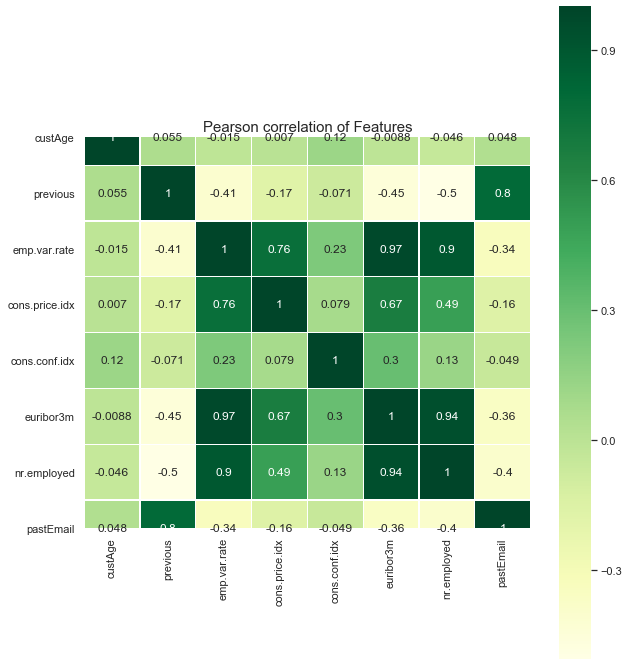

In [48]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

### Preprocessing

In [49]:
import os
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [50]:
duplicates = df[df.duplicated(keep='last')] # find duplicated data
duplicates

,custAge,profession,marital,housing,loan,contact,month,day_of_week,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,responded,campaignBinned,pdaysBinned,poutcome_comb,schooling_mod
1,39.260125,blue-collar,married,no,no,cellular,jul,mon,0,1.4,93.918,-42.7,4.960,5228.1,0,no,"(0, 5]","(23.0, 1000.0]",failure,unknown
13,49.000000,blue-collar,married,yes,no,cellular,aug,thu,0,1.4,93.444,-36.1,4.963,5228.1,0,no,"(0, 5]","(23.0, 1000.0]",failure,high.school
48,42.044444,management,married,no,no,cellular,nov,mon,0,-0.1,93.200,-42.0,4.191,5195.8,0,no,"(0, 5]","(23.0, 1000.0]",failure,unknown
134,38.067626,admin.,single,no,no,cellular,aug,wed,0,1.4,93.444,-36.1,4.964,5228.1,0,no,"(0, 5]","(23.0, 1000.0]",failure,university.degree
144,31.000000,blue-collar,married,yes,no,cellular,jul,fri,0,1.4,93.918,-42.7,4.963,5228.1,0,no,"(0, 5]","(23.0, 1000.0]",failure,basic.6y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6263,33.000000,admin.,married,no,no,cellular,aug,fri,0,1.4,93.444,-36.1,4.964,5228.1,0,no,"(0, 5]","(23.0, 1000.0]",failure,university.degree
6427,39.260125,blue-collar,married,no,no,cellular,jul,mon,0,1.4,93.918,-42.7,4.960,5228.1,0,no,"(0, 5]","(23.0, 1000.0]",failure,unknown
6531,33.000000,blue-collar,married,yes,yes,cellular,may,tue,0,-1.8,92.893,-46.2,1.291,5099.1,0,no,"(0, 5]","(23.0, 1000.0]",failure,basic.9y
6566,38.577206,services,single,yes,no,telephone,jun,fri,0,1.4,94.465,-41.8,4.959,5228.1,0,no,"(10, 20]","(23.0, 1000.0]",failure,high.school


In [51]:
df = df.drop_duplicates() # Duplicates
df.shape

(7309, 20)

### For easy indexing, the `responded` variable will be moved to the end of the dataframe. This will be accomplished by copying it as a new column, and then dropping the `responded` column.

In [52]:
df['Y'] = df['responded']
df = df.drop(['responded'], axis=1)

In [53]:
df.head()

,custAge,profession,marital,housing,loan,contact,month,day_of_week,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,campaignBinned,pdaysBinned,poutcome_comb,schooling_mod,Y
0,55.000000,admin.,single,no,no,cellular,nov,mon,0,-0.1,93.200,-42.0,4.191,5195.8,0,"(0, 5]","(23.0, 1000.0]",failure,university.degree,no
1,39.260125,blue-collar,married,no,no,cellular,jul,mon,0,1.4,93.918,-42.7,4.960,5228.1,0,"(0, 5]","(23.0, 1000.0]",failure,unknown,no
2,42.000000,technician,married,no,no,telephone,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0,"(0, 5]","(23.0, 1000.0]",failure,high.school,no
3,55.000000,management,divorced,yes,yes,cellular,jul,wed,0,1.4,93.918,-42.7,4.962,5228.1,0,"(0, 5]","(23.0, 1000.0]",failure,unknown,no
4,38.067626,admin.,divorced,yes,no,cellular,may,tue,1,-1.8,92.893,-46.2,1.291,5099.1,1,"(0, 5]","(23.0, 1000.0]",failure,university.degree,no


### Select dependent and independent variables

In [54]:
Xdata = df.iloc[:,:-1] # all but the last column
Ydata = df['Y']
print(Xdata.shape, Ydata.shape)

(7309, 19) (7309,)


Since the provided test data does not include values for `responded`, we will split the existing training set into a training set and a validation set.

In [55]:
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xdata, Ydata, test_size=0.2)
print('Xtrain: ', Xtrain.shape)
print('Xvalid: ', Xvalid.shape)
print('Ytrain: ', Ytrain.shape)
print('Yvalid: ', Yvalid.shape)

Xtrain:  (5847, 19)
Xvalid:  (1462, 19)
Ytrain:  (5847,)
Yvalid:  (1462,)


### Now comes the fun part of one-hot encoding all categorical features

In [56]:
# Create a boolean mask for object-type columns
categorical_feature_mask = Xdata.dtypes==object

# Filter categorical columns using the mask and turn it into a list
categorical_cols = Xdata.columns[categorical_feature_mask].tolist()

In [57]:
categorical_cols

['profession',
 'marital',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaignBinned',
 'pdaysBinned',
 'poutcome_comb',
 'schooling_mod']

In [58]:
# Create a list for the category abbreviatons with which to prepend the encoded column names
col_abbv = ['prof', 'mar', 'hou', 'ln', 'ctct', 'mo', 'day', 'cmpgn', 'pday', 'pout', 'sch']
# One-hot encode
Xtrain_enc = pd.get_dummies(Xtrain, prefix=col_abbv, columns=categorical_cols, drop_first=True)
Xvalid_enc = pd.get_dummies(Xvalid, prefix=col_abbv, columns=categorical_cols, drop_first=True)

In [59]:
Xtrain_enc.head()

,custAge,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,prof_blue-collar,prof_entrepreneur,...,"pday_(7.0, 15.0]","pday_(15.0, 23.0]","pday_(23.0, 1000.0]",pout_success,sch_basic.6y,sch_basic.9y,sch_high.school,sch_professional.course,sch_university.degree,sch_unknown
4491,59.000000,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3531,41.000000,0,-1.8,93.075,-47.1,1.453,5099.1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
960,38.577206,0,1.1,93.994,-36.4,4.856,5191.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
92,36.000000,0,1.4,93.444,-36.1,4.965,5228.1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3323,32.000000,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [60]:
Xvalid_enc.head()

,custAge,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,prof_blue-collar,prof_entrepreneur,...,"pday_(7.0, 15.0]","pday_(15.0, 23.0]","pday_(23.0, 1000.0]",pout_success,sch_basic.6y,sch_basic.9y,sch_high.school,sch_professional.course,sch_university.degree,sch_unknown
1039,36.0,0,1.4,94.465,-41.8,4.961,5228.1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2923,59.0,0,1.4,93.918,-42.7,4.961,5228.1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6734,56.0,0,-1.8,93.075,-47.1,1.410,5099.1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
548,45.0,0,1.4,93.444,-36.1,4.962,5228.1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1907,58.0,0,1.4,93.444,-36.1,4.966,5228.1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### The dataset is now one-hot encoded.

Text(0.5, 1.05, 'Pearson correlation of Features')

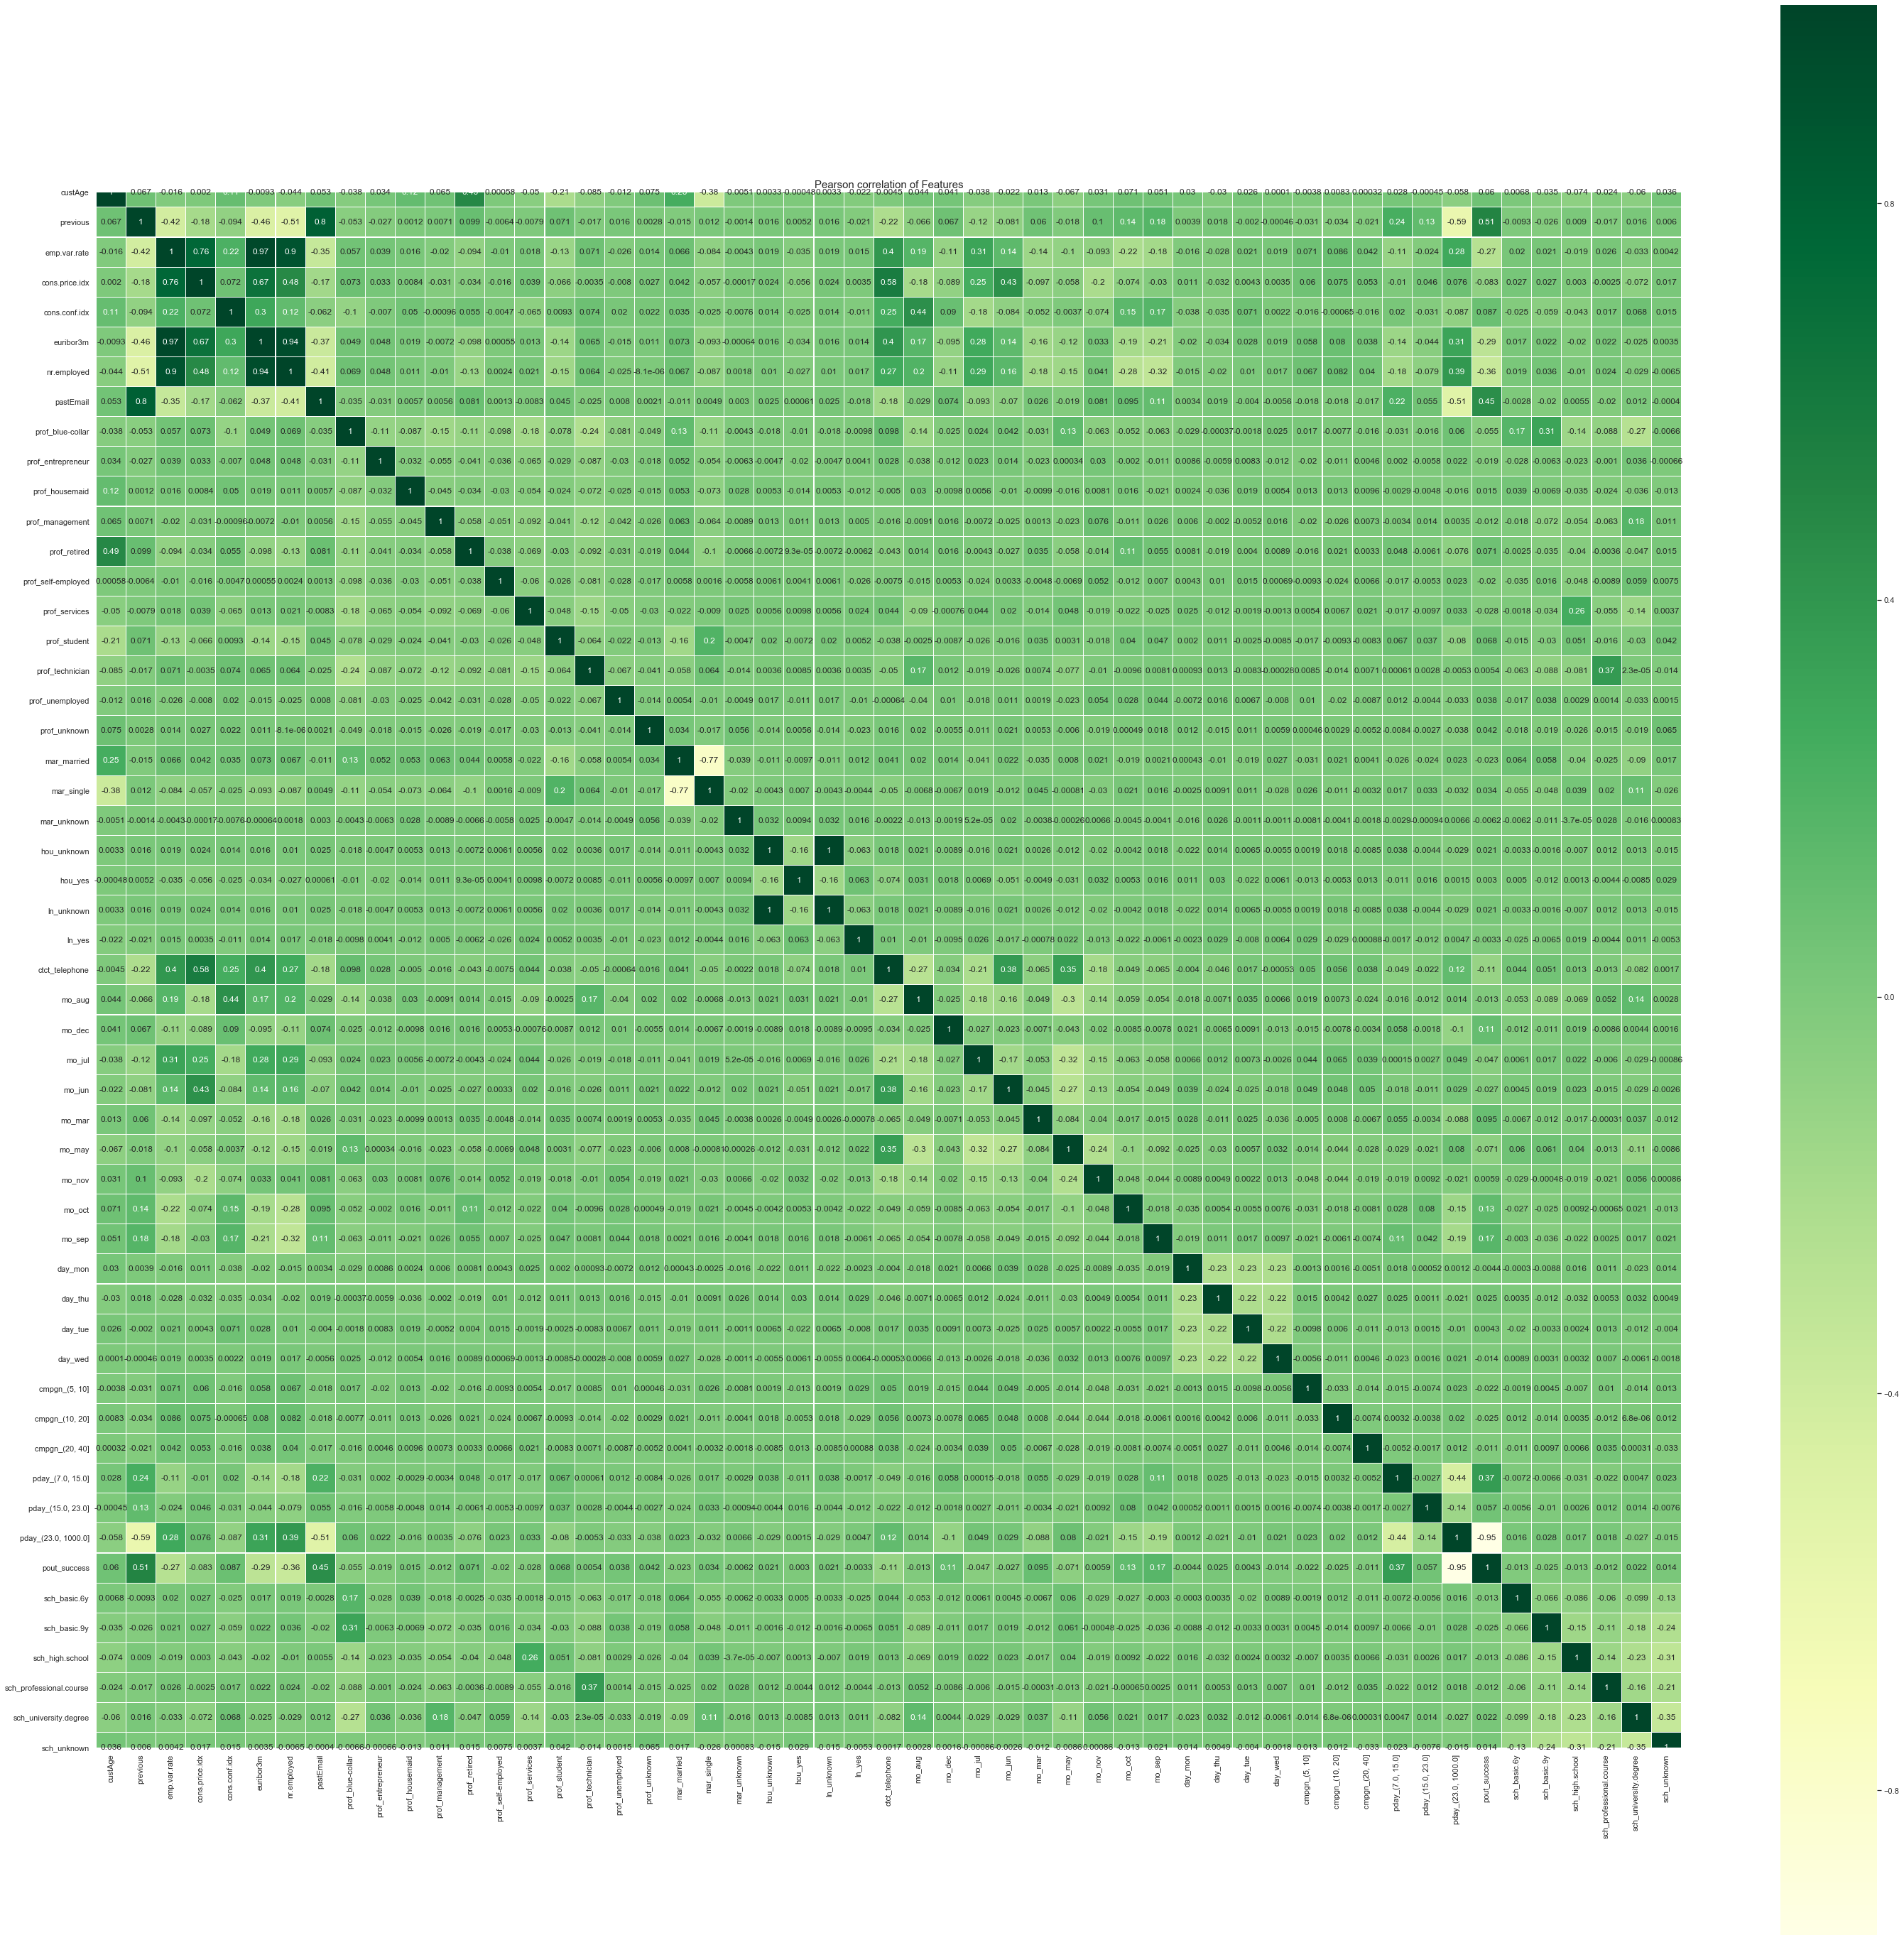

In [61]:
corr = Xtrain_enc.corr()
f, ax = plt.subplots(figsize=(50,50))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

There is a 1:1 correlation between hou_unknown and ln_unknown. We will drop ln_unknown from the model dataset. euribor3m is also highly correlated with nr.employed and emp.var.rate, so these will be dropped as well.

In [62]:
Xtrain_enc = Xtrain_enc.drop(['ln_unknown', 'emp.var.rate', 'nr.employed'], axis=1)
Xvalid_enc = Xvalid_enc.drop(['ln_unknown', 'emp.var.rate', 'nr.employed'], axis=1)

Text(0.5, 1.05, 'Pearson correlation of Features')

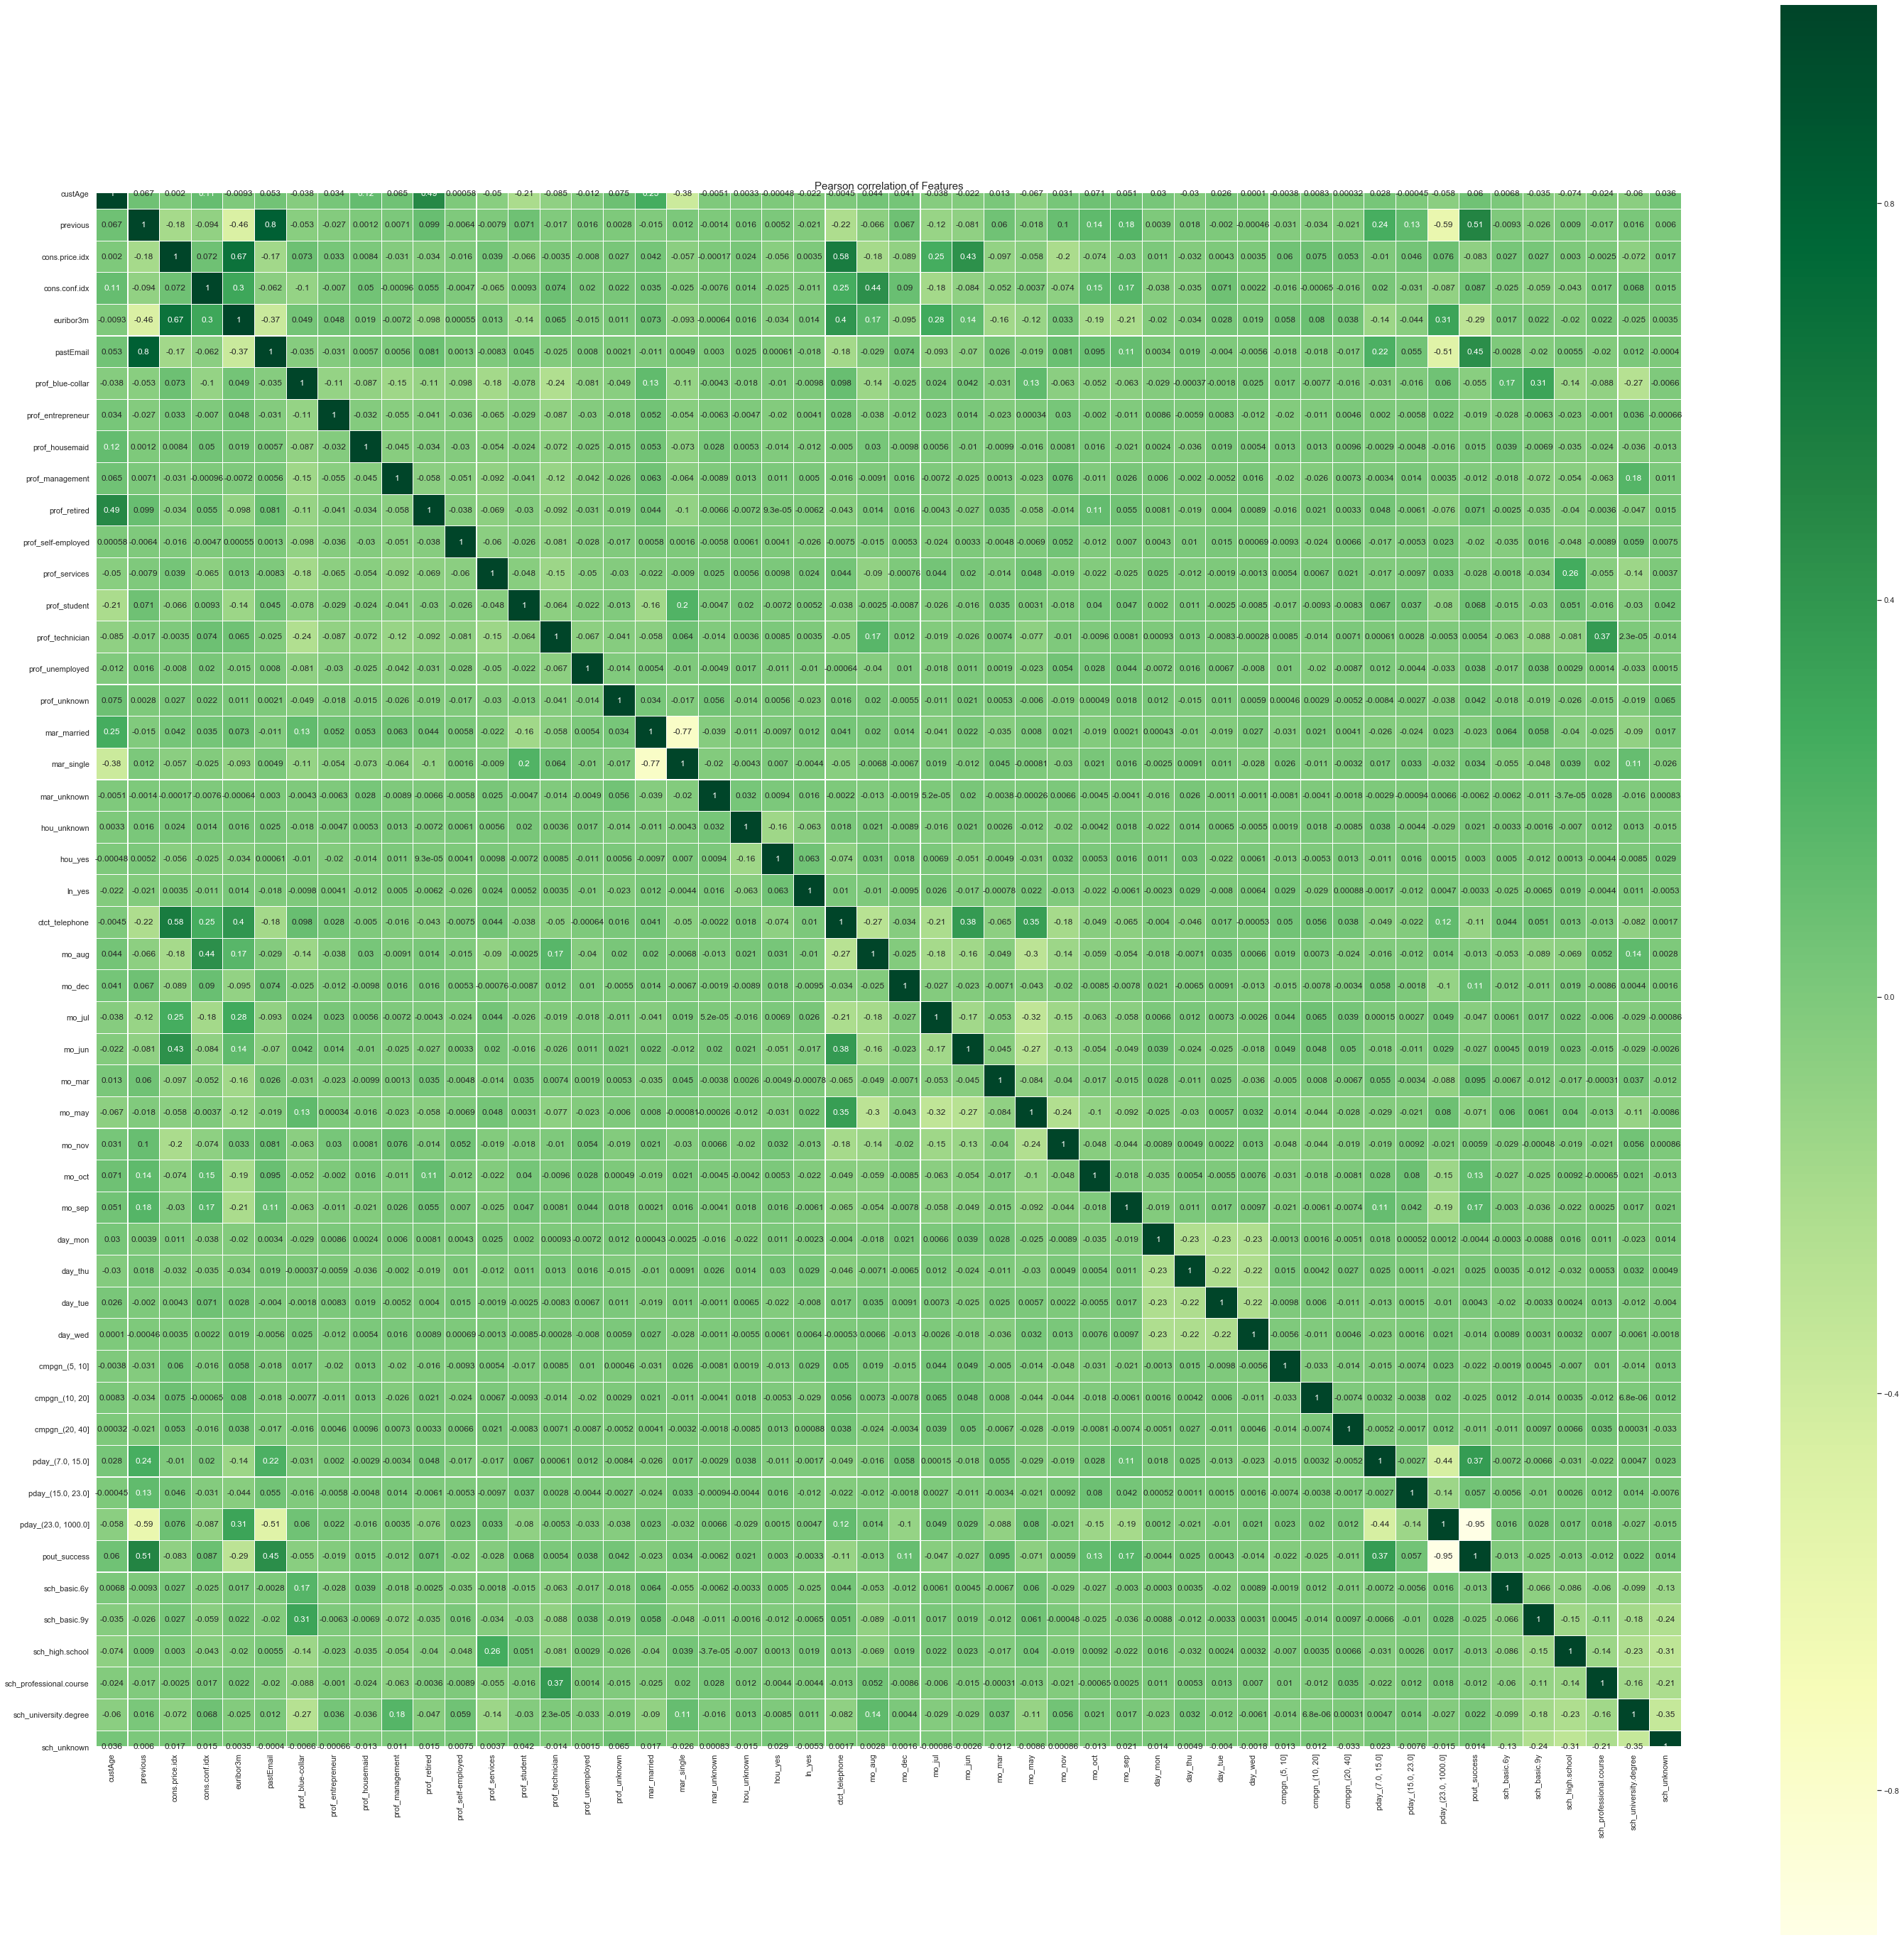

In [63]:
corr = Xtrain_enc.corr()
f, ax = plt.subplots(figsize=(50,50))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

### Now, replace 'yes' and 'no' values in Ytrain and Yvalid with '1' and '0':

In [64]:
Ytrain.replace({'no':0, 'yes':1}, inplace=True)
Yvalid.replace({'no':0, 'yes':1}, inplace=True)


### Evaluate with T-SNE plots

In [65]:
Xtrain_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5847 entries, 4491 to 1527
Data columns (total 50 columns):
custAge                    5847 non-null float64
previous                   5847 non-null int64
cons.price.idx             5847 non-null float64
cons.conf.idx              5847 non-null float64
euribor3m                  5847 non-null float64
pastEmail                  5847 non-null int64
prof_blue-collar           5847 non-null uint8
prof_entrepreneur          5847 non-null uint8
prof_housemaid             5847 non-null uint8
prof_management            5847 non-null uint8
prof_retired               5847 non-null uint8
prof_self-employed         5847 non-null uint8
prof_services              5847 non-null uint8
prof_student               5847 non-null uint8
prof_technician            5847 non-null uint8
prof_unemployed            5847 non-null uint8
prof_unknown               5847 non-null uint8
mar_married                5847 non-null uint8
mar_single                 5847 non-

In [66]:
Xvalid_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1039 to 4042
Data columns (total 50 columns):
custAge                    1462 non-null float64
previous                   1462 non-null int64
cons.price.idx             1462 non-null float64
cons.conf.idx              1462 non-null float64
euribor3m                  1462 non-null float64
pastEmail                  1462 non-null int64
prof_blue-collar           1462 non-null uint8
prof_entrepreneur          1462 non-null uint8
prof_housemaid             1462 non-null uint8
prof_management            1462 non-null uint8
prof_retired               1462 non-null uint8
prof_self-employed         1462 non-null uint8
prof_services              1462 non-null uint8
prof_student               1462 non-null uint8
prof_technician            1462 non-null uint8
prof_unemployed            1462 non-null uint8
prof_unknown               1462 non-null uint8
mar_married                1462 non-null uint8
mar_single                 1462 non-

In [67]:
# Since there were no values of 'mar_unknown' in the validation dataset, we will have to manually add that column:
Xvalid_enc['mar_unknown'] = 0

### Generate a t-distributed stochastic neighbor embedding plot

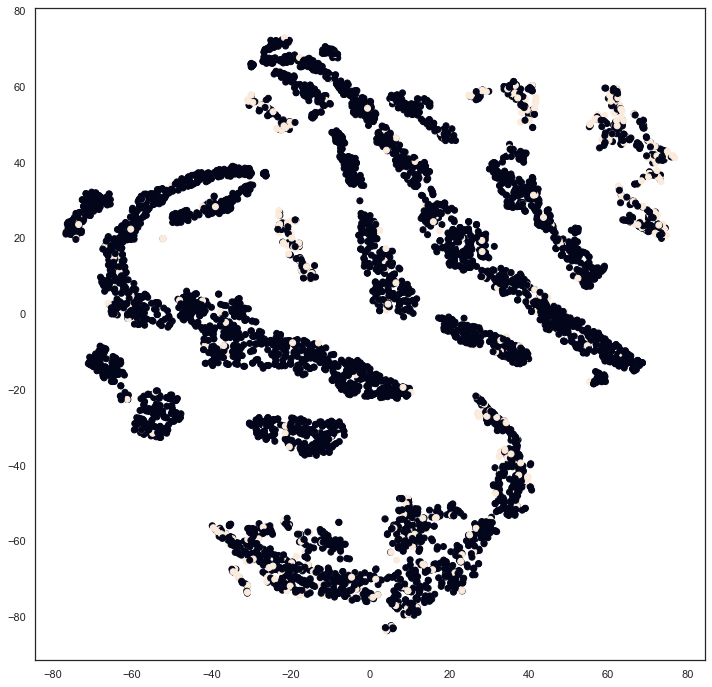

In [68]:
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsnedat = model.fit_transform(Xtrain_enc) 
plt.figure(figsize=(12,12))
plt.scatter(tsnedat[:, 0], tsnedat[:, 1], c=Ytrain.values)
plt.show()

### Now, a logistic regression will be run:

In [69]:
logmodel = LogisticRegression(class_weight='balanced', solver='warn') # Define the model
logmodel.fit(Xtrain_enc,Ytrain) # Train the model
Ypredict = logmodel.predict_proba(Xvalid_enc) # Predict probabilities from the held-back validation set
# Ypredict = logmodel.predict(Xvalid_enc) # Predict classes with highest probabilities

print("AUC: ",  roc_auc_score(Yvalid, Ypredict[:,1])) # Compare to actual validation classification
# print("AUC: ",  roc_auc_score(Yvalid, Ypredict)) # Compare to actual validation classification

AUC:  0.7737773088381331


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
Ypredict

array([[0.65904042, 0.34095958],
       [0.91793904, 0.08206096],
       [0.30739889, 0.69260111],
       ...,
       [0.64530974, 0.35469026],
       [0.85143215, 0.14856785],
       [0.32550271, 0.67449729]])

### Now, create vectors of the logistic coefficients and their labels so that a feature importance table can be created:

In [71]:
coefs = logmodel.coef_.T

In [72]:
cols=np.array(list(Xtrain_enc.columns))[np.newaxis].T

In [73]:
print(cols.shape)
print(coefs.shape)

featureImportance=pd.DataFrame(np.hstack([cols,coefs]), columns=['Feature', 'Importance'])
featureImportance['Importance']=pd.to_numeric(featureImportance['Importance'])
featureImportance.sort_values(by='Importance', ascending=False)

(50, 1)
(50, 1)


,Feature,Importance
19,mar_unknown,0.912680
28,mo_mar,0.741189
48,sch_university.degree,0.632443
13,prof_student,0.564592
7,prof_entrepreneur,0.484146
44,sch_basic.6y,0.480373
46,sch_high.school,0.434522
31,mo_oct,0.428321
49,sch_unknown,0.410045
16,prof_unknown,0.382516


Initial analysis shows the strongest indicators of

In [74]:
featureImportance.sort_values(by='Importance', ascending=False).head()

,Feature,Importance
19,mar_unknown,0.912680
28,mo_mar,0.741189
48,sch_university.degree,0.632443
13,prof_student,0.564592
7,prof_entrepreneur,0.484146


In [75]:
# load the test dataset into the initial dataframe

Xtest = pd.read_csv('C:\DATA\marketing_test.csv', sep=',')

Xtest.info()

Xtest.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 22 columns):
Unnamed: 0        824 non-null int64
custAge           614 non-null float64
profession        824 non-null object
marital           824 non-null object
schooling         573 non-null object
default           824 non-null object
housing           824 non-null object
loan              824 non-null object
contact           824 non-null object
month             824 non-null object
day_of_week       748 non-null object
campaign          824 non-null int64
pdays             824 non-null int64
previous          824 non-null int64
poutcome          824 non-null object
emp.var.rate      824 non-null float64
cons.price.idx    824 non-null float64
cons.conf.idx     824 non-null float64
euribor3m         824 non-null float64
nr.employed       824 non-null float64
pmonths           824 non-null float64
pastEmail         824 non-null int64
dtypes: float64(7), int64(5), object(10)
memory usage: 14

,Unnamed: 0,custAge,profession,marital,schooling,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,NaN,entrepreneur,married,university.degree,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0
1,1,58.0,entrepreneur,married,university.degree,unknown,no,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.0,0
2,2,48.0,entrepreneur,married,NaN,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0
3,3,35.0,blue-collar,married,NaN,no,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,999.0,0
4,4,39.0,blue-collar,married,basic.6y,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0


Apply the same data wrangling to the test dataset:

In [76]:
Xtest['campaignBinned'] = pd.DataFrame(pd.cut(Xtest.campaign, bins = campaign_bins)) # Add column for binned values of campaign
Xtest['pdaysBinned'] = pd.DataFrame(pd.cut(Xtest.pdays, bins = pdays_bin)) # Add column for binned values of campaign
Xtest['poutcome_comb'] = ['failure' if x=='nonexistent' else x for x in Xtest['poutcome'] ] # Consolidate 'nonexistent' and 'failure' in poutcome
Xtest = Xtest.drop(['pmonths'], axis=1) # Drop the pmonths column due to multicollinearity with pdays
Xtest['schooling_mod'] = Xtest['schooling'].fillna('unknown') # Change missing values of schooling to 'unknown'
Xtest['schooling_mod'] = ['basic.4y' if x=='illiterate' else x for x in Xtest['schooling_mod'] ] # Change the lone value of 'illiterate'
Xtest = Xtest.drop(['emp.var.rate', 'nr.employed'], axis=1)

for index,row in Xtest.iterrows():
    if np.isnan(row['custAge']):
        Xtest.set_value(index,'custAge',ProfMeanAge[row['profession']]) # Replace null values in profession as before
        
Xtest = Xtest.drop(['schooling', 'default', 'campaign', 'pdays', 'poutcome'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [77]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 18 columns):
Unnamed: 0        824 non-null int64
custAge           824 non-null float64
profession        824 non-null object
marital           824 non-null object
housing           824 non-null object
loan              824 non-null object
contact           824 non-null object
month             824 non-null object
day_of_week       748 non-null object
previous          824 non-null int64
cons.price.idx    824 non-null float64
cons.conf.idx     824 non-null float64
euribor3m         824 non-null float64
pastEmail         824 non-null int64
campaignBinned    824 non-null object
pdaysBinned       823 non-null object
poutcome_comb     824 non-null object
schooling_mod     824 non-null object
dtypes: float64(4), int64(3), object(11)
memory usage: 116.0+ KB


One-hot encode the test set as before:

In [78]:
Xtest_enc = pd.get_dummies(Xvalid, prefix=col_abbv, columns=categorical_cols, drop_first=True)
Xtest_enc = Xtest_enc.drop(['emp.var.rate', 'nr.employed', 'ln_unknown'], axis=1)
Xtest_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1039 to 4042
Data columns (total 50 columns):
custAge                    1462 non-null float64
previous                   1462 non-null int64
cons.price.idx             1462 non-null float64
cons.conf.idx              1462 non-null float64
euribor3m                  1462 non-null float64
pastEmail                  1462 non-null int64
prof_blue-collar           1462 non-null uint8
prof_entrepreneur          1462 non-null uint8
prof_housemaid             1462 non-null uint8
prof_management            1462 non-null uint8
prof_retired               1462 non-null uint8
prof_self-employed         1462 non-null uint8
prof_services              1462 non-null uint8
prof_student               1462 non-null uint8
prof_technician            1462 non-null uint8
prof_unemployed            1462 non-null uint8
prof_unknown               1462 non-null uint8
mar_married                1462 non-null uint8
mar_single                 1462 non-

In [79]:
Ytest = logmodel.predict_proba(Xtest_enc)

print("AUC: ",  roc_auc_score(Yvalid, Ytest[:,1]))

AUC:  0.7734173286991062
